# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

In [1]:
! git clone https://github.com/ds4e/EDA

Cloning into 'EDA'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 59 (delta 11), reused 10 (delta 10), pack-reused 43 (from 1)
Receiving objects: 100% (59/59), 4.93 MiB | 17.12 MiB/s, done.
Resolving deltas: 100% (18/18), done.


**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.

(I have posted a pdf of my answers to these in my repo)

Instead of the mean, consider the median. Consider transformations that are non-decreasing (if  𝑥≥𝑥′ , then  𝑔(𝑥)≥𝑔(𝑥′) ), like  2+5×𝑋  or  arcsinh(𝑋) . Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?

Yes, a non-decreasing transformation of the median is the median of the transformed variable in this case. In a more simpler term, if half the values of x are less than or equal to m, and g is a non-decreasing function, with the transformative property, if x is less than m then g(x) is less than g(m) and vice versa for values greater than m. This property does apply to any quintile based on the more simplified explaination I gave above. The IQR, or Interquartile Range, is simply the difference between the 75th and 25th percentile. Because the property does apply to any quintile, then it should also apply to the IQR. This property can also apply to the range, or maximum - minimum. This will simply tranform the max and min to apply to the transofmred data.  

Consider a non-decreasing transformation  𝑔() . Is is always true that  𝑚(𝑔(𝑋))=𝑔(𝑚(𝑋)) ?

No, it is not always true that the mean of the transformed variable, which is m(g(X)) is equal to the transformation of the mean, g(m(X)). This is because the mean is a linear operator, but, transformations, like this one, are normally non-linear. Therefore, this is not always true.

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/EDA/assignment/data/ForeignGifts_edu.csv')

For Foreign Gift Amount, create a histogram and describe the variable.

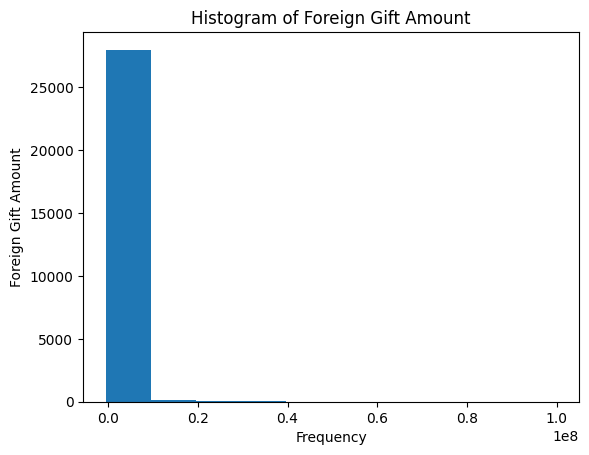

,ID,OPEID,Foreign Gift Received Date,Foreign Gift Amount
count,28221.00000,2.822100e+04,28221.000000,2.822100e+04
mean,14111.00000,2.487055e+05,42875.689061,5.882327e+05
std,8146.84531,3.009704e+05,641.917904,3.222011e+06
min,1.00000,1.020000e+05,41640.000000,-5.377700e+05
25%,7056.00000,1.315000e+05,42336.000000,5.700000e+03
50%,14111.00000,2.077000e+05,42934.000000,9.461500e+04
75%,21166.00000,2.974000e+05,43466.000000,3.761420e+05
max,28221.00000,4.279700e+06,44012.000000,1.000000e+08


In [3]:
plt.hist(df['Foreign Gift Amount'])
plt.xlabel('Frequency')
plt.ylabel('Foreign Gift Amount')
plt.title('Histogram of Foreign Gift Amount')
plt.show()


df.describe()

Describe Findings:

The histogram in this part is interesting looking and not quite what I expected. The x axis values need to be smaller in order to spread out the data more. But, the graph still does give a good representation of the sheer amount of money given in foreign gifts. The minimum value for foreign gift amount is negative though which makes me pause. I am not sure if this is because the receivor had to give money back to the giftor, but I would not expect the minimum value to be below zero.

For Gift Type, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?

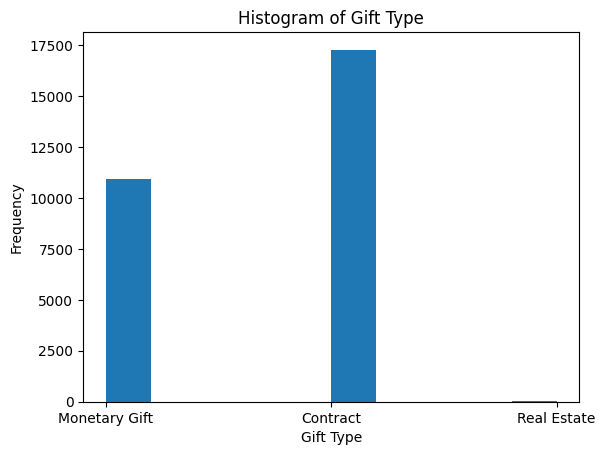

61.20973742957372
0.038978065979235324
38.75128450444704


In [4]:
plt.hist(df['Gift Type'])
plt.xlabel('Gift Type')
plt.ylabel('Frequency')
plt.title('Histogram of Gift Type')
plt.show()

#what proportion of gifts are contract, real estate, or monetary?
contract = df[df['Gift Type'] == 'Contract']
real_estate = df[df['Gift Type'] == 'Real Estate']
monetary = df[df['Gift Type'] == 'Monetary Gift']
print((len(contract) / len(df))* 100) #around 61.20% of gifts are contract
print((len(real_estate) / len(df))* 100) #around 0.04% of gifts are real estate
print((len(monetary) / len(df))* 100) #around 38.80% of gifts are monetary


Create a kernel density plot of the log of Foreign Gift Amount, and then a kernel density plot of the log of Foreign Gift Amount conditional on gift type. Do you notice any patterns?

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-5-55cd977cd11a>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Log Foreign Gift Amount"], shade=True)


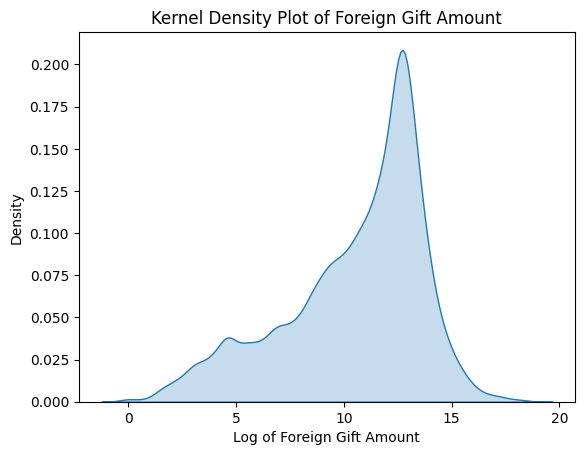

In [5]:
#kernel density plot for Foreign Gift Amount
df['Log Foreign Gift Amount'] = np.log(df['Foreign Gift Amount'])
import seaborn as sns

sns.kdeplot(df["Log Foreign Gift Amount"], shade=True)
plt.xlabel('Log of Foreign Gift Amount')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Foreign Gift Amount')
plt.show()

#The trends that I am seeing in this plot align with the raw data. The log amount of foreign gift prices has the highest density between 10 and 15.

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


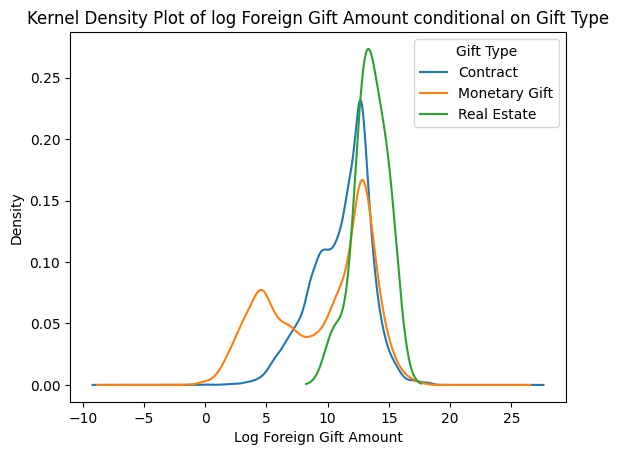

In [6]:
#kernel density plot for log Foreign Gift Amount conditional on gift type
df['log_Foreign Gift Amount'] = np.log(df['Foreign Gift Amount'])
df.groupby('Gift Type')['log_Foreign Gift Amount'].plot(kind='kde')
plt.xlabel('Log Foreign Gift Amount')
plt.ylabel('Density')
plt.title('Kernel Density Plot of log Foreign Gift Amount conditional on Gift Type')
plt.legend(title='Gift Type')
plt.show()


There differences between the traditional kernel graph and the kernel graph conditional on gift type are not super large, but nonetheless importnat. The graph that separates out the gift types paints a much clearer picture of the data. The Log of the Foreign Gift amount still has a majority of the data in between 10 and 15 for both graphs. However, in the graph sorted by gift type, it is clearer that real estate had the highest density compared to the other gift types and monetary gifts has some outliers towards the left of the graph. While overall both graphs present the same data, the kernel graph conditional on gift types provides the person looking at the graph more information then the plain kernel graph.

What are the top 15 countries in terms of the number of gifts?

In [10]:
country_counts = df['Country of Giftor'].value_counts()
top_15_countries = country_counts.head(15)
print(top_15_countries)

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64


What are the top 15 countries in terms of the amount given?

In [9]:
country_amount = df.groupby('Country of Giftor')['Foreign Gift Amount'].sum()
top_15_countries_amount = country_amount.sort_values(ascending=False).head(15)
print(top_15_countries_amount)

Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64


What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


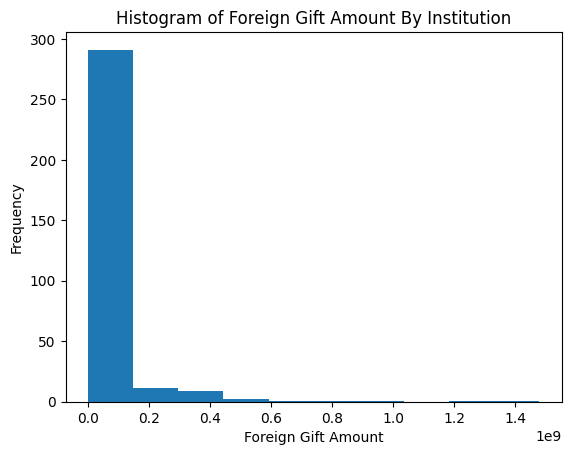

In [11]:
#What are the top 15 institutions in terms of the total amount of money they receive?
top_15_money_received = df.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print(top_15_money_received)

#Make a histogram of the total amount received by all institutions.
plt.hist(df.groupby('Institution Name')['Foreign Gift Amount'].sum())
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Foreign Gift Amount By Institution')
plt.show()

Which giftors provide the most money, in total?

In [12]:
giftors = df.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False)
print(giftors) #Qatar foundation gave the most money in total

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
                                          ...    
Jeong, Yeoncheol                                1
Francois, Pierre                                1
Park, Kwanhong                                  1
Wu, Jinyan                                      1
Zhang, Stephanie                                1
Name: Foreign Gift Amount, Length: 8993, dtype: int64


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  

In [14]:
Airbnb = pd.read_csv('/content/EDA/assignment/data/airbnb_hw.csv')

What are are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data.

In [15]:
#What are are the dimensions of the data?
Airbnb.describe()

#How many observations are there?
print("Number of Observations: ", Airbnb.shape[0])

#What are the variables included?
print("Variables Included: ", Airbnb.columns)


#Use .head() to examine the first few rows of data
print(Airbnb.head())

Number of Observations:  30478
Variables Included:  Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')
    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0  

Cross tabulate Room Type and Property Type. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?

In [16]:
room_type_property_type = pd.crosstab(Airbnb['Property Type'], Airbnb['Room Type'])
print(room_type_property_type)

number_of_rentals_by_type = Airbnb['Property Type'].value_counts()
print(number_of_rentals_by_type)
#The most common property type is an Apartment

#Based on these findings, the types of properties where private rooms are more common than renting the entire property are B&B, Dorm, House, Hut, Other, Tent, and Treehouse

Room Type        Entire home/apt  Private room  Shared room
Property Type                                              
Apartment                  15669         10748          685
Bed & Breakfast               13           155           12
Boat                           7             1            0
Bungalow                       4             0            0
Cabin                          1             1            0
Camper/RV                      6             1            0
Castle                         0             1            0
Chalet                         0             1            0
Condominium                   72            22            0
Dorm                           4            16           11
House                        752          1258           80
Hut                            0             2            0
Lighthouse                     1             0            0
Loft                         392           312           49
Other                         14        

For Price, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use log to transform price into a new variable, price_log, and take these steps again.

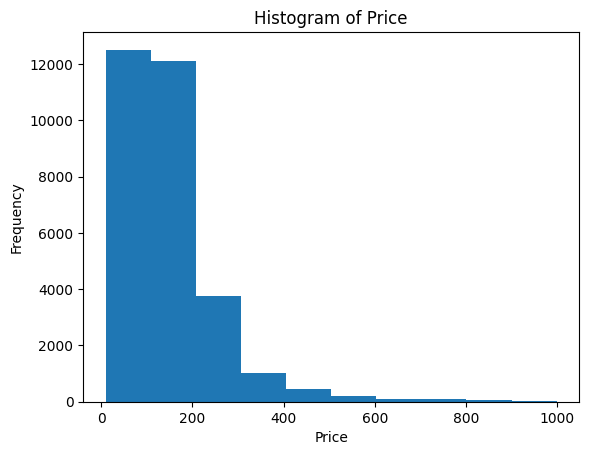

<ipython-input-17-29f07332cdab>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Airbnb["Price"], shade=True)


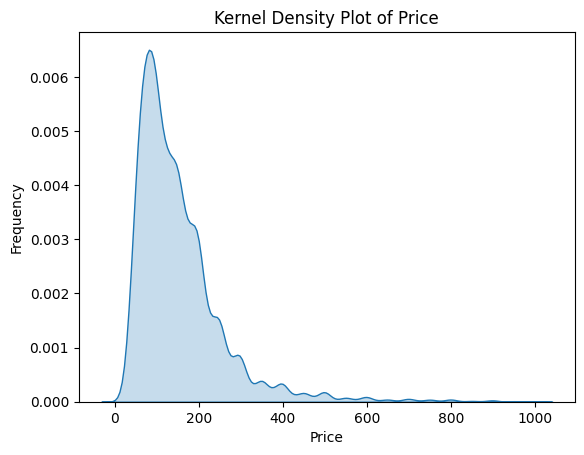

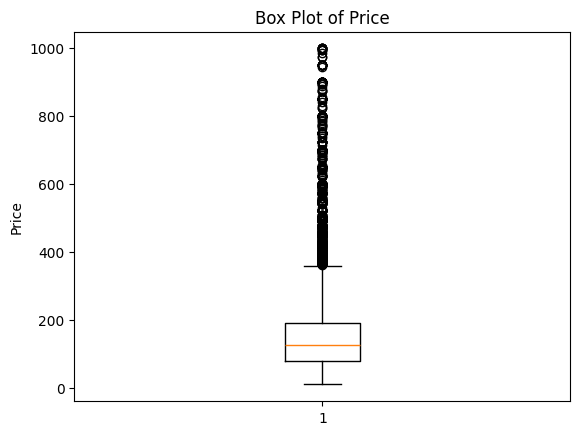

,Price
count,30297.000000
mean,153.357032
std,108.895698
min,10.000000
25%,80.000000
50%,125.000000
75%,192.000000
max,999.000000


In [17]:
Airbnb['Price'] = pd.to_numeric(Airbnb['Price'], errors='coerce')
Airbnb = Airbnb.dropna(subset=['Price'])

plt.hist(Airbnb['Price'])
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

sns.kdeplot(Airbnb["Price"], shade=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Kernel Density Plot of Price')
plt.show()

plt.boxplot(Airbnb['Price'])
plt.ylabel('Price')
plt.title('Box Plot of Price')
plt.show()

Airbnb['Price'].describe()

#The data is badly scaled when you analyze the box plot. Most of the data in the histogram and kernel density plot are also clumped towards lower prices. If the price axis had some more values instead of such a long range or more space to include more values then the data would be more spread out and a little bit easier to analyze.

Use log to transform price into a new variable, price_log, and take these steps again.

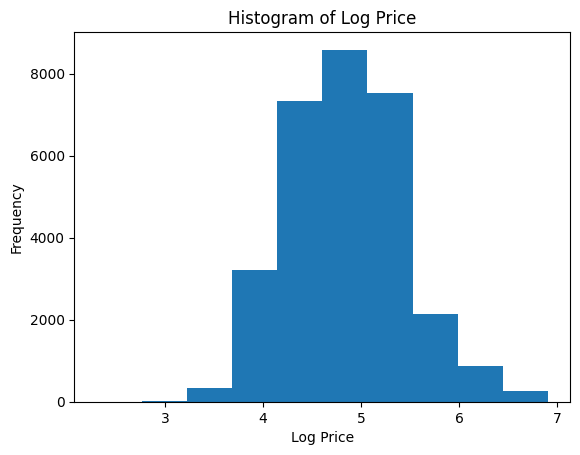

<ipython-input-18-7eae578a9cc8>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Log_price, shade=True)


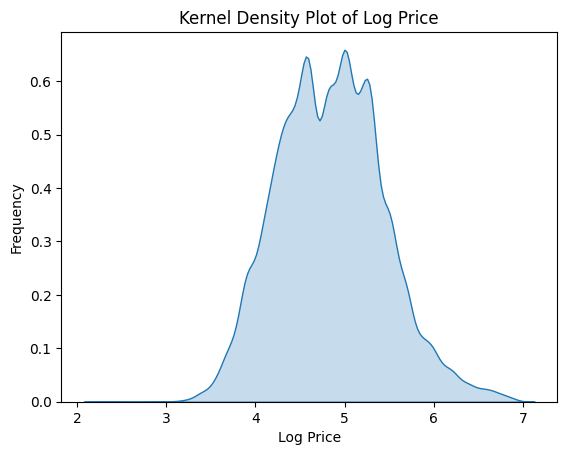

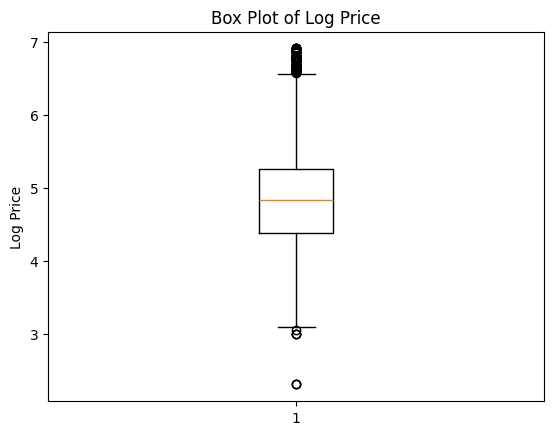

,Price
count,30297.000000
mean,4.845370
std,0.596999
min,2.302585
25%,4.382027
50%,4.828314
75%,5.257495
max,6.906755


In [18]:
Lg_price = Airbnb['Price']
Log_price = np.log(Lg_price)

plt.hist(Log_price)
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.title('Histogram of Log Price')
plt.show()

sns.kdeplot(Log_price, shade=True)
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.title('Kernel Density Plot of Log Price')
plt.show()

plt.boxplot(Log_price)
plt.ylabel('Log Price')
plt.title('Box Plot of Log Price')
plt.show()

Log_price.describe()

Make a scatterplot of price_log and Beds. Describe what you see. Use .groupby() to compute a desciption of Price conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.

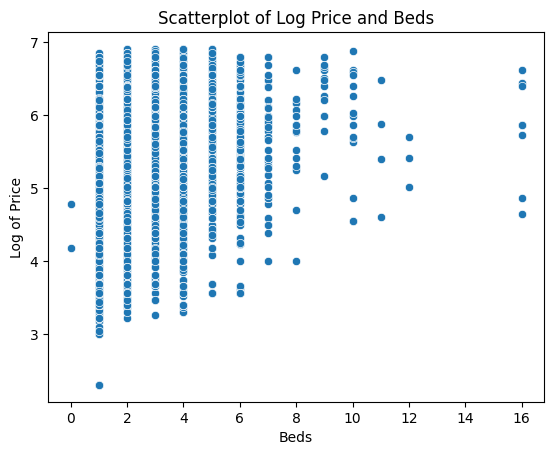

,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,92.000000,38.183766,65.0,78.50,92.0,105.50,119.0
1.0,20307.0,124.757670,75.685752,10.0,75.00,100.0,155.00,950.0
2.0,6561.0,186.702332,115.044205,25.0,115.00,160.0,225.00,999.0
3.0,2029.0,234.928043,142.288189,26.0,140.00,200.0,299.00,999.0
4.0,766.0,280.554830,175.512312,27.0,150.00,240.0,363.75,999.0
5.0,274.0,322.000000,190.319415,35.0,186.00,285.0,425.00,995.0
6.0,166.0,316.313253,201.157585,35.0,183.75,271.0,399.00,900.0
7.0,45.0,341.377778,220.116631,55.0,177.00,300.0,445.00,900.0
8.0,20.0,331.850000,155.652202,55.0,218.75,339.5,408.75,750.0


In [19]:
sns.scatterplot(x=Airbnb['Beds'], y=Log_price, data=Airbnb)
plt.xlabel('Beds')
plt.ylabel('Log of Price')
plt.title('Scatterplot of Log Price and Beds')
plt.show()

Airbnb.groupby('Beds')['Price'].describe()

#Describe any patterns you see in avg price and SD in prices
#Average prices in the scatterplot of log price and beds are decently spread out. It appears that two beds is the most common number of beds for a rental to have in this set of data. There are some outliers in the data at 16 beds which is extremely high and can likely skew some of the data. When looking at the standard deviation, the numbers are somewhat all over the place. There is an extremely low outlier at a standard deviaiotn of 38, another one at 75, but then most of the other standard devisions are between 100 and 300, more closly clumped together.

Make a scatterplot of price_log and Beds, but color the graph by Room Type and Property Type. What patterns do you see? Compute a description of Price conditional on Room Type and Property Type. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

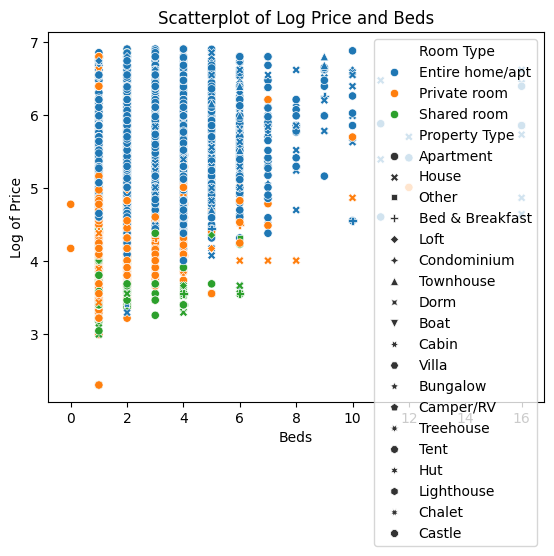

count        mean         std    min  \
Room Type       Property Type                                             
Entire home/apt Apartment        15550.0  200.210161  109.967435   10.0   
                Bed & Breakfast     13.0  184.538462  119.814172   85.0   
                Boat                 7.0  158.428571   51.110524  100.0   
                Bungalow             4.0  150.750000   46.464144   87.0   
                Cabin                1.0  250.000000         NaN  250.0   
                Camper/RV            6.0  114.333333  107.685963   45.0   
                Condominium         71.0  281.126761  175.313998   80.0   
                Dorm                 4.0   44.250000   24.060687   30.0   
                House              723.0  234.554633  159.785974   27.0   
                Lighthouse           1.0   39.000000         NaN   39.0   
                Loft               379.0  284.910290  184.515517   55.0   
                Other               10.0  290.800000  273.526273   66.0   
                Townhouse           81.0  242.037037  166.755243   66.0   
                Villa                3.0  206.333333   89.667906  120.0   
Private room    Apartment        10741.0   91.605903   46.356168   10.0   
                Bed & Breakfast    155.0   97.161290   47.031971   32.0   
                Boat                 1.0  120.000000         NaN  120.0   
                Cabin                1.0   80.000000         NaN   80.0   
                Camper/RV            1.0   39.000000         NaN   39.0   
                Castle               1.0  150.000000         NaN  150.0   
                Chalet               1.0   99.000000         NaN   99.0   
                Condominium         22.0   98.590909   40.576394   46.0   
                Dorm                16.0   86.562500   40.738137   50.0   
                House             1258.0   77.750397   49.402650   25.0   
                Hut                  2.0   75.000000   35.355339   50.0   
                Loft               310.0   99.077419   63.875489   39.0   
                Other               28.0  176.642857  141.484252   39.0   
                Tent                 4.0  126.250000   94.989034   40.0   
                Townhouse           52.0   83.365385   30.578109   45.0   
                Treehouse            1.0   95.000000         NaN   95.0   
                Villa                4.0  126.250000   71.107313   60.0   
Shared room     Apartment          684.0   77.853801   57.875888   20.0   
                Bed & Breakfast     12.0  143.666667  245.328104   30.0   
                Dorm                11.0   73.181818   46.328864   30.0   
                House               79.0   46.822785   25.152743   10.0   
                Loft                49.0   78.816327   87.521824   30.0   
                Other                4.0  148.750000  134.806961   70.0   
                Townhouse            1.0   95.000000         NaN   95.0   
                Treehouse            3.0  167.666667  114.788211   95.0   

                                    25%    50%     75%    max  
Room Type       Property Type                                  
Entire home/apt Apartment        135.00  175.0  230.00  999.0  
                Bed & Breakfast  121.00  130.0  220.00  525.0  
                Boat             122.50  150.0  182.00  250.0  
                Bungalow         133.50  160.5  177.75  195.0  
                Cabin            250.00  250.0  250.00  250.0  
                Camper/RV         49.00   74.0  114.00  325.0  
                Condominium      155.00  200.0  360.00  850.0  
                Dorm              30.00   33.5   47.75   80.0  
                House            125.00  188.0  299.00  950.0  
                Lighthouse        39.00   39.0   39.00   39.0  
                Loft             160.00  220.0  350.00  985.0  
                Other            123.75  177.5  350.00  850.0  
                Townhouse        135.00  189.0  295.00  900.0  

In [20]:
sns.scatterplot(x=Airbnb['Beds'], y=Log_price, data=Airbnb, hue=Airbnb['Room Type'], style=Airbnb['Property Type'])
plt.xlabel('Beds')
plt.ylabel('Log of Price')
plt.title('Scatterplot of Log Price and Beds')
plt.show()

Airbnb.groupby(['Room Type', 'Property Type'])['Price'].describe() #Description of price conditional on room type and property type

In [108]:
highest_room_type_prices = Airbnb.groupby('Room Type')['Price'].mean().sort_values(ascending=False)
print(highest_room_type_prices) #the room type with the highest average price is the entire home or apartment

highest_standard_deviation_room_type_prices = Airbnb.groupby('Room Type')['Price'].std().sort_values(ascending=False)
print(highest_standard_deviation_room_type_prices) #the room type with the highest standard deviation of prices is the entire home or apartment.

Room Type
Entire home/apt    204.061525
Private room        90.663227
Shared room         76.553974
Name: Price, dtype: float64
Room Type
Entire home/apt    116.531136
Shared room         65.756210
Private room        47.914195
Name: Price, dtype: float64


In [109]:
highest_property_type_prices = Airbnb.groupby('Property Type')['Price'].mean().sort_values(ascending=False)
print(highest_property_type_prices) #the property type with the highest average prices is a condo

highest_standard_deviation_property_type_prices = Airbnb.groupby('Property Type')['Price'].std().sort_values(ascending=False)
print(highest_standard_deviation_property_type_prices) #the property type with the highest standard deviation is other

#Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
#The mean appears to be a more reliable estimate of central tendency because it may give a better prediction of the price for a property and room type then the median due to there being a few outliers that could skew the median more than the mean.

Property Type
Condominium        237.946237
Other              201.166667
Loft               193.166667
Townhouse          179.365672
Cabin              165.000000
Villa              160.571429
Apartment          153.863170
Boat               153.625000
Bungalow           150.750000
Castle             150.000000
Treehouse          149.500000
House              131.598058
Tent               126.250000
Bed & Breakfast    106.572222
Camper/RV          103.571429
Chalet              99.000000
Dorm                76.354839
Hut                 75.000000
Lighthouse          39.000000
Name: Price, dtype: float64
Property Type
Other              183.231150
Condominium        172.754121
Loft               169.094068
Townhouse          152.097295
House              127.421195
Cabin              120.208153
Apartment          104.112805
Camper/RV          102.343958
Treehouse          100.520313
Tent                94.989034
Bed & Breakfast     84.701977
Villa               83.908397
Boat          

We've looked a bit at this price_log and Beds scatterplot. Use seaborn to make a jointplot with kind=hex. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

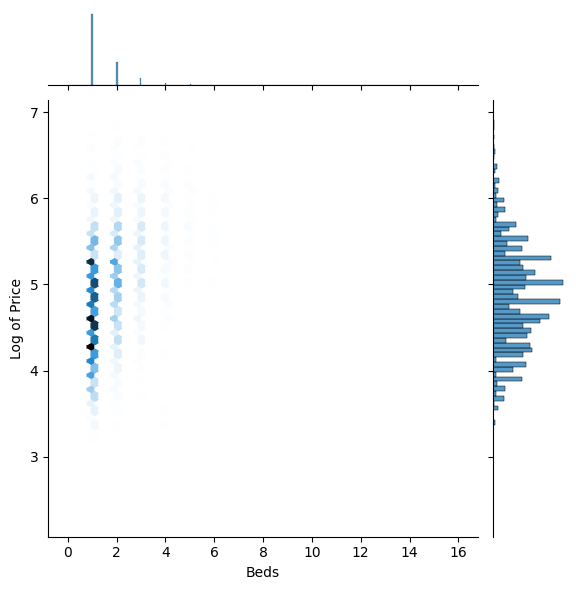

In [21]:
sns.jointplot(data=Airbnb, x=Airbnb['Beds'], y=Log_price, kind='hex')
plt.xlabel('Beds')
plt.ylabel('Log of Price')
plt.show()

Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

The data is mostly distributed around properties with 1 to two beds, with some more at 3, 4, and 5 but not nearly as many. The data is also distributed around a log price of 4 to 6. This mostly lines up with the plots I made in parts 5 and 6 but this essentially combines them which is really nice to see all of the data playing against each other. I think it is easier to read the other plots becuase everything is spread out, but this plot with everything combined is still a nice and mostly easy way to organize data.